# Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.columns

Index([             'Part ID',    'Planning Leadtime',         'Order Policy',
                'Order Point',     'Safety Stock Qty',      'Fixed Order Qty',
             'Days Of Supply',    'Minimum Order Qty',    'Maximum Order Qty',
         'Multiple Order Qty',                  'Fab',                  'Pur',
                    'Stocked',          'Detail Only',              'Purc Lt',
                   'Abc Code',     'Inventory Locked',           'Inventory$',
         'Unit Material Cost',     'Annual Usage Qty',        'Prev Yr Usage',
             'Roll Ann Usage',          'Qty On Hand',    'Qty Available Mrp',
                   'TotAlloc',           'Coeff_Code',             'Stock Um',
           'Def Orig Country',       'Primary Whs Id',       'Primary Loc Id',
         'Annual Usage Value',       2666342.46838269,             'Profit %',
       'Cummulatove Profit %',           'Jan (2018)',           'Feb (2018)',
                 'Mar (2018)',           'Apr (2018)

In [4]:
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

Average monthly demand for 2018

In [6]:
demand_2018 = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0).values
demand_2018

array([50.03671875, 48.42405063, 28.76298701, 57.31210191, 40.6557377 ,
       46.51639344, 40.30239617, 45.10610526, 59.62758621, 70.70143885,
       37.13111111, 36.66759398])

Fitting the Linear Regression model

In [9]:
months_2018 = np.arange(1, 13).reshape(-1, 1)  # Reshape for compatibility with LinearRegression model
model = LinearRegression()
model.fit(months_2018.reshape(-1, 1), demand_2018)

LinearRegression()

In [10]:
# Output the fitted model's slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

slope, intercept

(0.22233168398074937, 45.32519580707933)

In [14]:
months_2019 = np.arange(13, 25).reshape(-1, 1)  # From January (13) to December (24) of 2019

# Predict demand for 2019
predictions_2019 = model.predict(months_2019)
actual_demand_2019 = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0).values

In [20]:
forecast_errors = actual_demand_2019 - predictions_2019
mad = np.mean(np.abs(forecast_errors))
mse = mean_squared_error(actual_demand_2019, predictions_2019)
mape = np.mean(np.abs(forecast_errors / actual_demand_2019)) * 100
mad, mse, mape


(8.320255504780368, 133.5670206150564, 13.968306123313448)

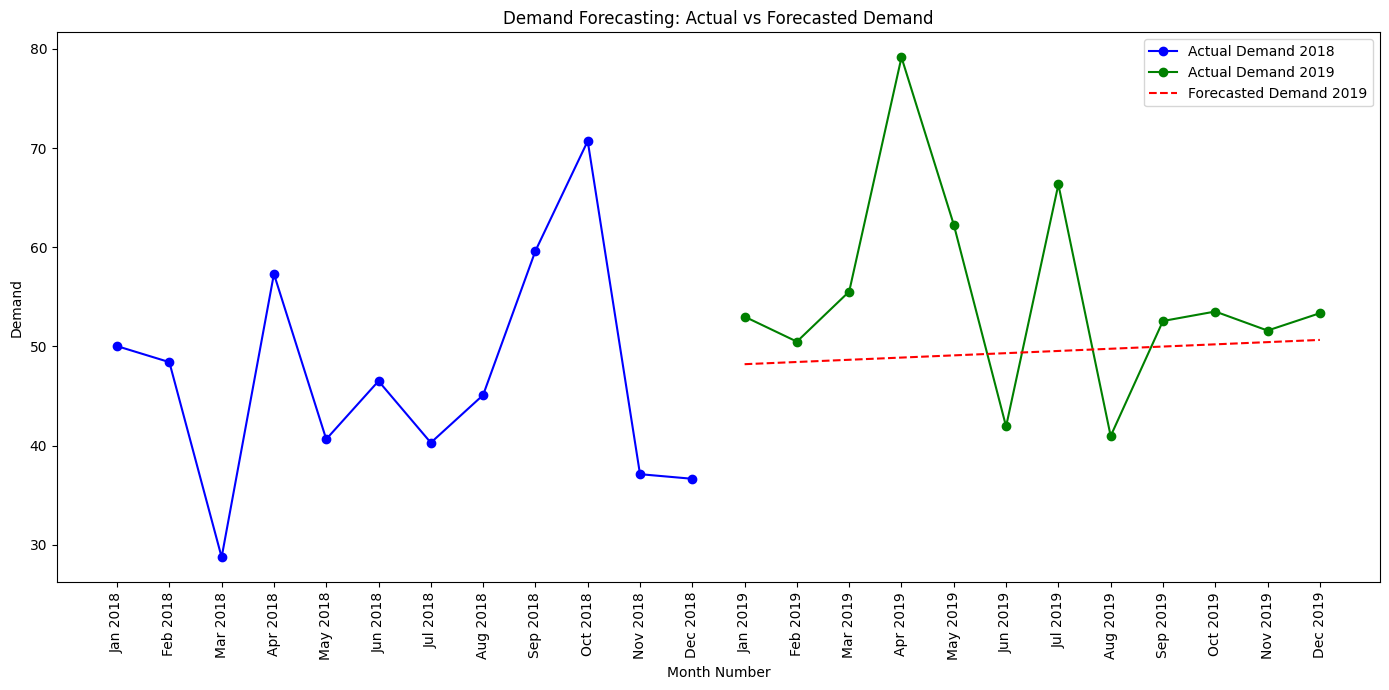

In [23]:
months_combined = np.arange(1, 25)
demand_combined = np.concatenate([demand_2018, actual_demand_2019])
plt.figure(figsize=(14, 7))
plt.plot(months_combined[:12], demand_2018, label='Actual Demand 2018', marker='o', color='blue')
plt.plot(months_combined[12:], actual_demand_2019, label='Actual Demand 2019', marker='o', color='green')
plt.plot(months_combined[12:], predictions_2019, label='Forecasted Demand 2019', linestyle='--', color='red')

plt.title('Demand Forecasting: Actual vs Forecasted Demand')
plt.xlabel('Month Number')
plt.ylabel('Demand')
plt.xticks(months_combined, 
           ['Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018', 
            'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 
            'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 
            'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()